# DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
olympics_complete = pd.read_csv('olympics_complete.csv')
olympics_complete

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.931370e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.532185e+12,1.354190e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DEN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,DEN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NED,2.619105e+11,1.476009e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,DNW,Poland,POL,NaN,3.435630e+07
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",DNW,Poland,POL,5.390805e+11,3.801174e+07
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",DNW,Poland,POL,5.390805e+11,3.801174e+07
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,DNW,Poland,POL,1.746858e+11,3.866348e+07


In [3]:
olympics_complete.isnull().sum()

ID                  0
Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Country Code        0
GDP             88500
Population      66101
dtype: int64

In [4]:
# So, let's take data from 1972 onwards only and for Summer olympics only
olympics_complete_subset = olympics_complete.loc[(olympics_complete['Year'] > 1971) & (olympics_complete['Season'] == "Summer"), :]

# Reset row indices
olympics_complete_subset = olympics_complete_subset.reset_index()

olympics_complete_subset

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.931370e+11,1.164970e+09
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.532185e+12,1.354190e+09
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,DNW,Finland,FIN,1.260195e+11,5.176209e+06
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,DNW,Finland,FIN,1.321292e+11,5.124573e+06
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,DNW,Finland,FIN,1.260195e+11,5.176209e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141853,271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,DNW,Argentina,ARG,1.646579e+11,3.866880e+07
141854,271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,DNW,USA,USA,1.279110e+12,2.098960e+08
141855,271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,DNW,Russia,RUS,2.597101e+11,1.465969e+08
141856,271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,DNW,Russia,RUS,5.910167e+11,1.440673e+08


In [5]:
olympics_complete_subset.isnull().sum()

index               0
ID                  0
Name                0
Sex                 0
Age               685
Height           6663
Weight           6921
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Country Code        0
GDP             13224
Population       2414
dtype: int64

## Exploratory Data Analysis

In [6]:
olympics_complete_subset['Medal_Won'] =np.where(olympics_complete_subset.loc[:,'Medal'] == 'DNW', 0, 1)
olympics_complete_subset

,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Country Code,GDP,Population,Medal_Won
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.931370e+11,1.164970e+09,0
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.532185e+12,1.354190e+09,0
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,DNW,Finland,FIN,1.260195e+11,5.176209e+06,0
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,DNW,Finland,FIN,1.321292e+11,5.124573e+06,0
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,DNW,Finland,FIN,1.260195e+11,5.176209e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141853,271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,DNW,Argentina,ARG,1.646579e+11,3.866880e+07,0
141854,271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,DNW,USA,USA,1.279110e+12,2.098960e+08,0
141855,271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,DNW,Russia,RUS,2.597101e+11,1.465969e+08,0
141856,271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,DNW,Russia,RUS,5.910167e+11,1.440673e+08,0


## Unique Events

In [7]:
# Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.
identify_team_events = pd.pivot_table(olympics_complete_subset,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

identify_team_events

Medal,Team,Year,Event,Bronze,Gold,Silver
1250,Argentina,2004,Basketball Men's Basketball,0,12,0
1263,Argentina,2004,Football Men's Football,0,16,0
1347,Argentina,2008,Cycling Men's Madison,0,2,0
1354,Argentina,2008,Football Men's Football,0,18,0
1504,Argentina,2016,Hockey Men's Hockey,0,18,0
...,...,...,...,...,...,...
66092,USA,2016,Water Polo Women's Water Polo,0,13,0
66355,Ukraine,1996,Sailing Men's Two Person Dinghy,0,2,0
66848,Ukraine,2008,"Fencing Women's Sabre, Team",0,4,0
67060,Ukraine,2012,Rowing Women's Quadruple Sculls,0,4,0


In [8]:
team_sports = identify_team_events['Event'].unique()

print('Number of Team Events: ', len(team_sports))

team_sports

Number of Team Events:  108


array(["Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', 'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Men's Double Sculls",
       "Rowing Women's Coxless Pairs", "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
       "Sailing Women's Two Person Dinghy",
       "Swimming Men's 4 x 100 metres Freestyle Relay",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Water Polo Women's Water Polo", "Rowing Men's Coxless Pairs",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Swimming Women's 4 x 100 metres Medley Relay",
       "Swim

In [9]:
# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = olympics_complete_subset['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = olympics_complete_subset['Medal_Won'] == 1

# Put 1 under team event if medal is won and event in team event list
olympics_complete_subset['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
olympics_complete_subset['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
olympics_complete_subset['Event_Category'] = olympics_complete_subset['Single_Event'] + \
olympics_complete_subset['Team_Event']

olympics_complete_subset

/tmp/ipykernel_8893/2993452381.py:12: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  olympics_complete_subset['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)


,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,...,Event,Medal,Team,Country Code,GDP,Population,Medal_Won,Team_Event,Single_Event,Event_Category
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,...,Basketball Men's Basketball,DNW,China,CHN,4.931370e+11,1.164970e+09,0,0,0,0
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,...,Judo Men's Extra-Lightweight,DNW,China,CHN,8.532185e+12,1.354190e+09,0,0,0,0
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,...,Badminton Men's Singles,DNW,Finland,FIN,1.260195e+11,5.176209e+06,0,0,0,0
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,...,Sailing Women's Windsurfer,DNW,Finland,FIN,1.321292e+11,5.124573e+06,0,0,0,0
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,...,Sailing Women's Windsurfer,DNW,Finland,FIN,1.260195e+11,5.176209e+06,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141853,271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,...,Hockey Men's Hockey,DNW,Argentina,ARG,1.646579e+11,3.866880e+07,0,0,0,0
141854,271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,...,Football Men's Football,DNW,USA,USA,1.279110e+12,2.098960e+08,0,0,0,0
141855,271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,...,Rowing Men's Lightweight Coxless Fours,DNW,Russia,RUS,2.597101e+11,1.465969e+08,0,0,0,0
141856,271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,...,Rowing Men's Lightweight Coxless Fours,DNW,Russia,RUS,5.910167e+11,1.440673e+08,0,0,0,0


In [10]:
olympics_complete_subset[['Year', 'City']].drop_duplicates().sort_values('Year')

,Year,City
11,1972,Munich
36,1976,Montreal
68,1980,Moskva
10,1984,Los Angeles
12,1988,Seoul
0,1992,Barcelona
3,1996,Atlanta
2,2000,Sydney
9,2004,Athina
6,2008,Beijing


In [11]:
# Correct city names in the dataset
olympics_complete_subset['City'].replace(['Athina', 'Moskva'], ['Athens', 'Moscow'], inplace = True)

In [12]:
# city to country mapping dictionary
city_to_country = {'Tokyo': 'Japan',
                  'Mexico City': 'Mexico',
                  'Munich': 'Germany',
                  'Montreal': 'Canada',
                  'Moscow': 'Russia',
                  'Los Angeles': 'USA',
                  'Seoul': 'South Korea',
                  'Barcelona': 'Spain',
                  'Atlanta': 'USA',
                  'Sydney': 'Australia',
                  'Athens': 'Greece',
                  'Beijing': 'China',
                  'London': 'UK',
                  'Rio de Janeiro': 'Brazil'}

# Map cities to countries
olympics_complete_subset['Country_Host'] = olympics_complete_subset['City'].map(city_to_country)

#print the 
olympics_complete_subset.loc[:, ['Year', 'Country_Host']].drop_duplicates().sort_values('Year')

,Year,Country_Host
11,1972,Germany
36,1976,Canada
68,1980,Russia
10,1984,USA
12,1988,South Korea
0,1992,Spain
3,1996,USA
2,2000,Australia
9,2004,Greece
6,2008,China


# MY WORKING

In [13]:
olympics_complete_subset


,index,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,...,Medal,Team,Country Code,GDP,Population,Medal_Won,Team_Event,Single_Event,Event_Category,Country_Host
0,0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,...,DNW,China,CHN,4.931370e+11,1.164970e+09,0,0,0,0,Spain
1,1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,...,DNW,China,CHN,8.532185e+12,1.354190e+09,0,0,0,0,UK
2,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,FIN,2000 Summer,2000,...,DNW,Finland,FIN,1.260195e+11,5.176209e+06,0,0,0,0,Australia
3,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,FIN,1996 Summer,1996,...,DNW,Finland,FIN,1.321292e+11,5.124573e+06,0,0,0,0,USA
4,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,FIN,2000 Summer,2000,...,DNW,Finland,FIN,1.260195e+11,5.176209e+06,0,0,0,0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141853,271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,ARG,2004 Summer,2004,...,DNW,Argentina,ARG,1.646579e+11,3.866880e+07,0,0,0,0,Greece
141854,271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,USA,1972 Summer,1972,...,DNW,USA,USA,1.279110e+12,2.098960e+08,0,0,0,0,Germany
141855,271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,RUS,2000 Summer,2000,...,DNW,Russia,RUS,2.597101e+11,1.465969e+08,0,0,0,0,Australia
141856,271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,RUS,2004 Summer,2004,...,DNW,Russia,RUS,5.910167e+11,1.440673e+08,0,0,0,0,Greece


In [14]:
df = olympics_complete_subset.drop(['index','ID','Name','Games','Country Code','Team_Event',
       'Single_Event', 'Event_Category','Medal'], axis=1)


In [15]:
df.dtypes

Sex              object
Age             float64
Height          float64
Weight          float64
NOC              object
Year              int64
Season           object
City             object
Sport            object
Event            object
Team             object
GDP             float64
Population      float64
Medal_Won         int64
Country_Host     object
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'])
df['NOC']=encoder.fit_transform(df['NOC'])
df['Season']=encoder.fit_transform(df['Season'])
df['Sport']=encoder.fit_transform(df['Sport'])
df['Event']=encoder.fit_transform(df['Event'])
df['Team']=encoder.fit_transform(df['Team'])
df['Country_Host']=encoder.fit_transform(df['Country_Host'])
df['City']=encoder.fit_transform(df['City'])


In [17]:
df

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Team,GDP,Population,Medal_Won,Country_Host
0,1,24.0,180.0,80.0,39,1992,0,2,4,60,39,4.931370e+11,1.164970e+09,0,8
1,1,23.0,170.0,60.0,39,2012,0,4,17,174,39,8.532185e+12,1.354190e+09,0,9
2,1,31.0,172.0,70.0,65,2000,0,11,2,55,62,1.260195e+11,5.176209e+06,0,0
3,0,30.0,159.0,55.5,65,1996,0,1,22,233,62,1.321292e+11,5.124573e+06,0,10
4,0,34.0,159.0,55.5,65,2000,0,11,22,233,62,1.260195e+11,5.176209e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141853,1,27.0,168.0,76.0,7,2004,0,0,16,172,7,1.646579e+11,3.866880e+07,0,5
141854,1,21.0,175.0,75.0,206,1972,0,8,12,152,194,1.279110e+12,2.098960e+08,0,4
141855,1,24.0,183.0,72.0,164,2000,0,11,20,200,152,2.597101e+11,1.465969e+08,0,0
141856,1,28.0,183.0,72.0,164,2004,0,0,20,200,152,5.910167e+11,1.440673e+08,0,5


In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

Sex             0
Age             0
Height          0
Weight          0
NOC             0
Year            0
Season          0
City            0
Sport           0
Event           0
Team            0
GDP             0
Population      0
Medal_Won       0
Country_Host    0
dtype: int64

In [20]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Team', 'GDP', 'Population', 'Medal_Won',
       'Country_Host'],
      dtype='object')

In [21]:
df.corr()

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Event,Team,GDP,Population,Medal_Won,Country_Host
Sex,1.000000,0.144784,0.481254,0.510635,0.004279,-0.158013,NaN,0.022170,-0.004135,-0.061375,0.003323,-0.087148,-0.076849,-0.036934,0.042742
Age,0.144784,1.000000,0.142163,0.206071,0.011465,0.140626,NaN,-0.021565,-0.065817,-0.077531,0.009190,0.048631,-0.057356,0.022852,-0.047167
Height,0.481254,0.142163,1.000000,0.796184,0.018109,0.028383,NaN,-0.009837,0.039866,0.008788,0.007142,0.008507,-0.059916,0.084239,-0.001022
Weight,0.510635,0.206071,0.796184,1.000000,0.012130,0.030494,NaN,-0.013245,0.111659,0.073224,0.001720,0.008968,-0.057288,0.079056,-0.006368
NOC,0.004279,0.011465,0.018109,0.012130,1.000000,0.027488,NaN,0.000483,-0.009606,-0.010650,0.836030,0.271475,-0.064332,0.051495,0.000303
Year,-0.158013,0.140626,0.028383,0.030494,0.027488,1.000000,NaN,-0.129398,0.026003,0.034616,0.005970,0.249609,0.081734,0.021214,-0.223536
Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,0.022170,-0.021565,-0.009837,-0.013245,0.000483,-0.129398,NaN,1.000000,0.009747,0.007288,-0.002649,-0.039438,-0.021424,-0.009696,-0.550880
Sport,-0.004135,-0.065817,0.039866,0.111659,-0.009606,0.026003,NaN,0.009747,1.000000,0.991473,-0.019509,0.019760,0.022297,0.053562,-0.019264
Event,-0.061375,-0.077531,0.008788,0.073224,-0.010650,0.034616,NaN,0.007288,0.991473,1.000000,-0.020216,0.026150,0.028815,0.051237,-0.022062


<Axes: >

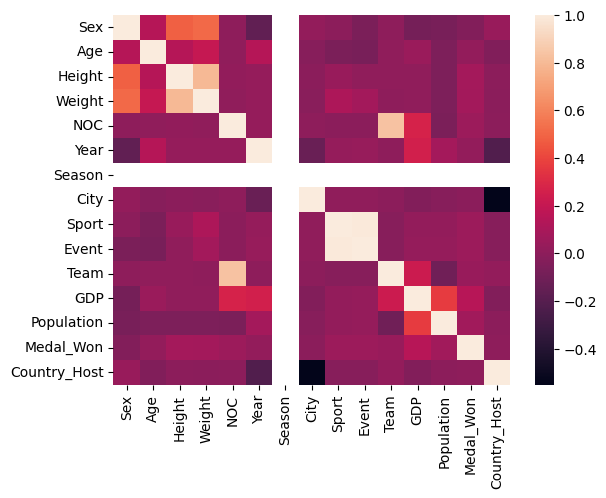

In [22]:
sns.heatmap(df.corr())

In [23]:
X = df.drop(['Medal_Won','Season','NOC','Event'], axis=1)
Y = df['Medal_Won']


In [24]:
X.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Year', 'City', 'Sport', 'Team',
       'GDP', 'Population', 'Country_Host'],
      dtype='object')

In [25]:

Y.unique()

array([0, 1])

In [26]:
from sklearn.model_selection import train_test_split

# split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7,random_state=12345)



In [27]:
def crossValidateData(regressor):
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    
    
    predictions = regressor.predict(x_test)
    predictions = np.array(predictions, dtype=np.int16)
    e=np.sqrt(mean_squared_error(predictions,y_test))
    # print(algorithm,'mean_squared_error',e)
    f=mean_absolute_error(predictions,y_test)
    # print(algorithm,'mean_absolute_error',f)
    return f

In [28]:
def Linearregression(x_train, y_train):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model = model.fit(x_train, y_train)
    return model

In [29]:
def Logisticregression(x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model = model.fit(x_train, y_train)
    return model

In [30]:
def knnregression(x_train, y_train):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model = model.fit(x_train, y_train)
    return model

In [31]:
def svmregression(x_train, y_train):
    from sklearn.svm import SVC
    model = SVC
    model = regressor.fit(x_train, y_train)
    return model

In [32]:
def nbregressor(x_train, y_train):
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model = model.fit(x_train, y_train)
    return model

In [33]:
def dtregressor(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model = model.fit(x_train, y_train)
    return model

In [34]:
def rfregressor(x_train, y_train):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier
    model = model.fit(x_train, y_train)
    return model

In [35]:
def xgregressor(x_train, y_train):
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model = model.fit(x_train, y_train)
    return model

In [36]:

model_lg = Logisticregression(x_train, y_train)
model_knn = knnregression(x_train, y_train)
model_nb = nbregressor(x_train, y_train)
model_dt = dtregressor(x_train, y_train)


In [51]:
def evalute_model(model):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,f1_score, precision_score
    
    
    y_true =y_test
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_true,y_pred)
    #print(cm)
    print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}%")
    #print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}%")
    #print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}%")
    #print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}%")


In [52]:
evalute_model(model_lg)

accuracy = 85.32%


In [53]:

evalute_model(model_nb)

accuracy = 82.34%


In [54]:
evalute_model(model_dt)

accuracy = 86.31%


In [55]:
evalute_model(model_knn)

accuracy = 86.25%


In [56]:
accuracy = crossValidateData(model_lg)

accuracy

0.14681843115743282

In [57]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'NOC', 'Year', 'Season', 'City',
       'Sport', 'Event', 'Team', 'GDP', 'Population', 'Medal_Won',
       'Country_Host'],
      dtype='object')

# SAVE IT INTO CSV FILE

In [58]:

olympics_complete_subset.to_csv('olympics_complete_subset.csv',index=False)

# Pickle formate

In [59]:
import pickle
model_file = open("Olympic Analysis.pkl",'wb')
pickle.dump(model_dt,model_file)
model_file.close()